In [2]:
import numpy as np

X = 2 *np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

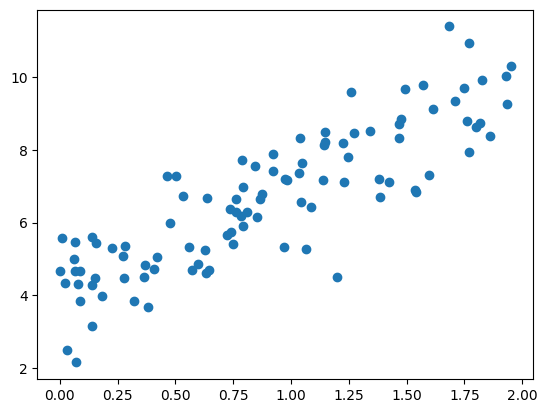

In [5]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [10]:
X_b = np.c_[np.ones((100, 1)), X] # added x0 = 1 for every sample
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.050059  ]
 [2.91162396]]


In [14]:
y_predicted = theta_best[0]*X + theta_best[1]

<function matplotlib.pyplot.show(close=None, block=None)>

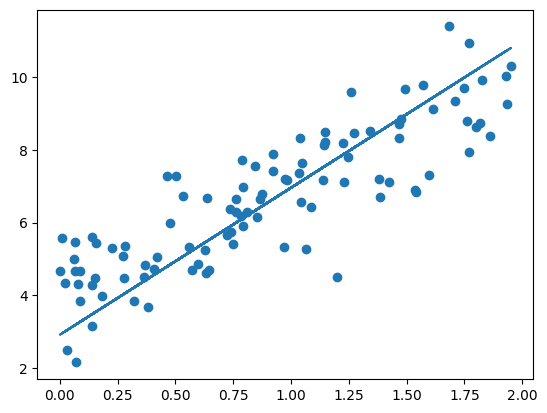

In [16]:
plt.scatter(X, y)
plt.plot(X, y_predicted)
plt.show

Using linear_model

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.050059]), array([[2.91162396]]))

Gradient descent

In [19]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # random initation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.050059  ],
       [2.91162396]])

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01660483]), array([2.89021682]))

polynomial regression

In [74]:
m = 100
X = 6 * np.random.randn(m, 1) - 3
X.sort(axis = 0)
y = 0.5 * X**2 + X + 2 +np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])

[-18.5056474]


In [75]:
print(X_poly[0])

[-18.5056474  342.45898575]


In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.coef_)
y_poly = lin_reg.intercept_ + X * lin_reg.coef_[0][0] + X**2 * lin_reg.coef_[0][1]

[[0.97505718 0.49857401]]


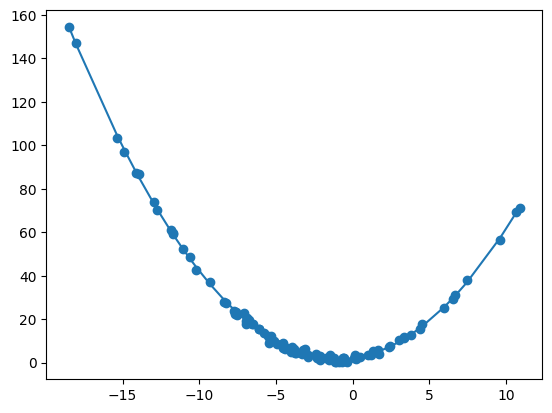

In [78]:
plt.plot(X, y_poly)
plt.scatter(X, y)
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b--", linewidth=3, label="val")

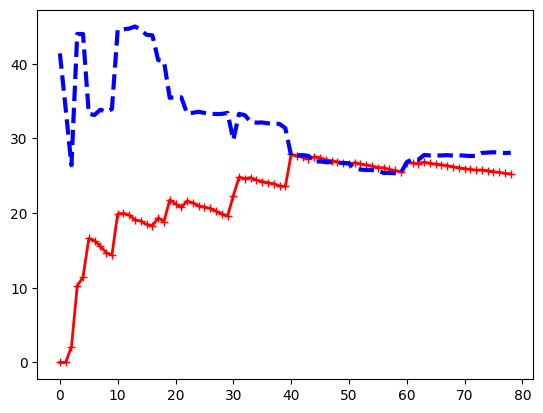

In [82]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    (lin_reg, LinearRegression()),
])

plot_
